# Introduction 
- fictional dataset on student performance from [here](http://roycekimmons.com/tools/generated_data/exams) 
  - columns
    - gender
    - race/ethnicity
    - parental level of education
    - lunch
    - test preparation course
    - test scores: maths, reading & writing
- objective: To identify correlation betweeen each variable (categorical) and the test scores (continuous)

## Import packages & dataset


In [0]:
# Import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Importing dataset into colab
from google.colab import files 
uploaded = files.upload()

Saving StudentsPerformance.csv to StudentsPerformance.csv


## Overview of the data



In [0]:
def overview(x):
    '''
    Read a comma-separated values (csv) file into DataFrame.
    Print 5 rows of data
    Print number of rows and columns
    Print datatype for each column
    Print number of NULL/NaN values for each column
    Print summary data
    
    Return:
    data, rtype: DataFrame
    '''
    data = pd.read_csv(x)
    print("The first 5 rows of data:\n", data.head())
    print("\n")
    print("The number of (Rows,Columns):\n", data.shape)
    print("\n")
    print("Data type of each column:\n", data.dtypes)
    print("\n")
    print("The number of null values in each column:\n", data.isnull().sum())
    print("\n")
    print("Summary of all the test scores:\n", data.describe())
    return data

df = overview("StudentsPerformance.csv")

The first 5 rows of data:
    gender race/ethnicity  ... reading score writing score
0  female        group B  ...            72            74
1  female        group C  ...            90            88
2  female        group B  ...            95            93
3    male        group A  ...            57            44
4    male        group C  ...            78            75

[5 rows x 8 columns]


The number of (Rows,Columns):
 (1000, 8)


Data type of each column:
 gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object


The number of null values in each column:
 gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
mat

- As expected from a generator, no NaN values
- the summary of the test score shows there's little variation in the test scores among the 3 types of tests 

In [0]:
def categorical_counts(data, categorical_variables):
  ''' Count distinct values in categorical variables '''
  for feature in categorical_features:
    print("Number of distinct values in " + feature + ":\n", data[feature].value_counts())
    print("\n")
    
categorical_features = ['gender','race/ethnicity','parental level of education','lunch','test preparation course']
categorical_counts(df, categorical_features)

Number of distinct values in gender:
 female    518
male      482
Name: gender, dtype: int64


Number of distinct values in race/ethnicity:
 group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64


Number of distinct values in parental level of education:
 some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64


Number of distinct values in lunch:
 standard        645
free/reduced    355
Name: lunch, dtype: int64


Number of distinct values in test preparation course:
 none         642
completed    358
Name: test preparation course, dtype: int64




## Looking into distribution of test score among each variable


### Gender vs score

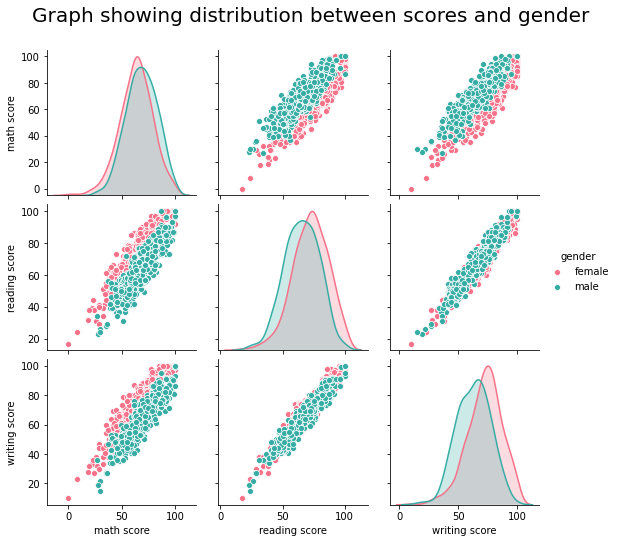

In [0]:
def distribution(dataset,variable):
    '''
    Args:
        dataset: Include DataFrame here
        variable: Include which column (categorical) in the data frame should be used for colour encoding.
    
    Returns:
    Seaborn plot with colour encoding
    '''
    g = sns.pairplot(data = dataset, hue = variable, palette = 'husl')
    g.fig.suptitle('Graph showing distribution between scores and {}'.format(variable), fontsize = 20)
    g.fig.subplots_adjust(top= 0.9)
    return g

distribution(df, 'gender')

- females seem to be better at writing & reading
- males seem to be better at maths

### Score and race


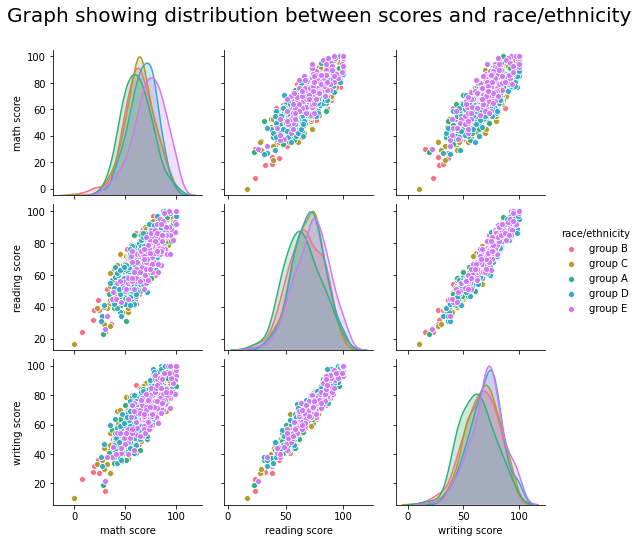

In [0]:
distribution(df, 'race/ethnicity')

- doesn't provide much information since the groups are unknown

### Score and parental education level

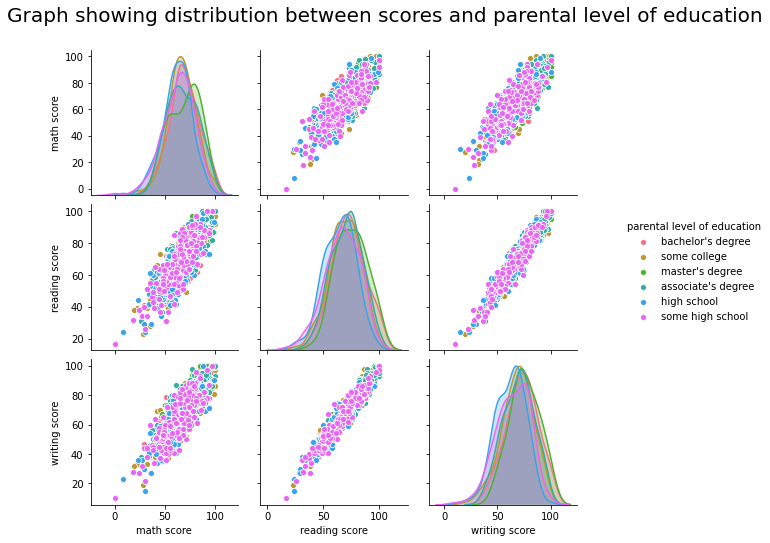

In [0]:
distribution(df, 'parental level of education')

- doesn't seem like there's an obvious trend between scores & parental level of education but difficult to see as there's a lot of overlap
- those with parents who have master's degrees seem to have higher scores in maths

#### School vs university for better representation
- 'high school' and 'some high school': represented as 'school' in the combined_parental column
- 'some college', 'associate's degree', 'bachelor's degree' and 'master's degree' represented as 'university' the combined_parental column

In [0]:
df['combined_parental'] = ['school' if x ==('high school' or 'some high school') else 'university' for x in df['parental level of education']] 
df  

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,combined_parental
0,female,group B,bachelor's degree,standard,none,72,72,74,university
1,female,group C,some college,standard,completed,69,90,88,university
2,female,group B,master's degree,standard,none,90,95,93,university
3,male,group A,associate's degree,free/reduced,none,47,57,44,university
4,male,group C,some college,standard,none,76,78,75,university
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,university
996,male,group C,high school,free/reduced,none,62,55,55,school
997,female,group C,high school,free/reduced,completed,59,71,65,school
998,female,group D,some college,standard,completed,68,78,77,university


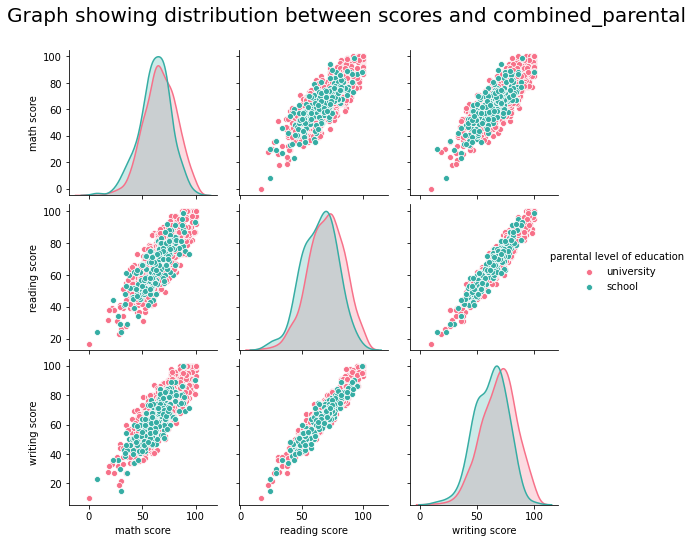

In [0]:
g = distribution(df, 'combined_parental')
g._legend.set_title('parental level of education')


- students whose parents went to university seem to perform better, especially in reading & writing 

### Score and lunch

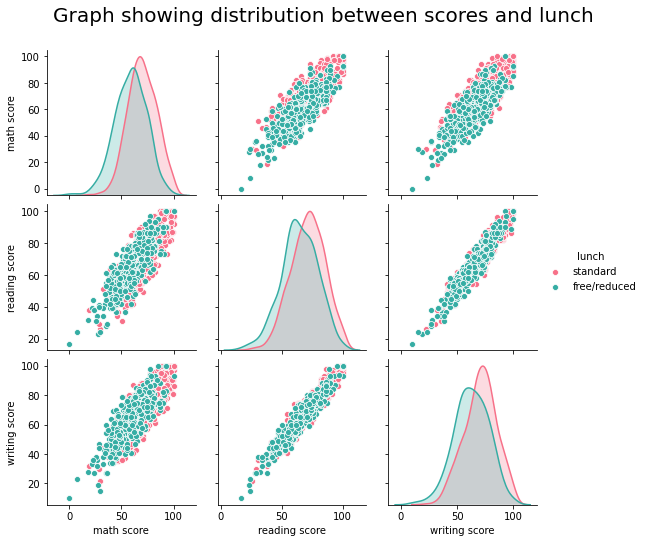

In [0]:
distribution(df, 'lunch')

- students with standard lunch seem to perform much better than those with free/reduced lunch in all 3 subjects
- perhaps reflecting the superior nutritional value in standard lunch

### Score vs Test preparation course 

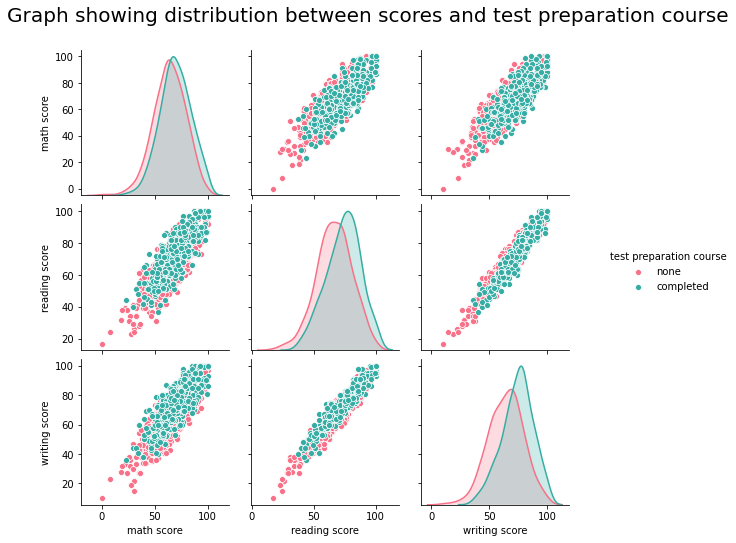

In [0]:
distribution(df, 'test preparation course')

- students with completed test prep course outperform those with no prep, especially in writing
- suggests that preparation is key for higher test scores

## Finding correlation between variables and test scores  using one-way ANOVA test

### one-way ANOVA
- can only be used for numerical response data, the "Y" (usually one variable) & numerical or (usually) categorical input data, the "X" (always one variable, hence the name "one-way")
#### hypothesis 
- The null hypothesis (H0) is that there is no difference between the groups and equality between means - ex) students have the same test scores regardless their gender 
- The alternative hypothesis (H1) is that there is a difference between the means and groups - ex) students have different test scores depending on their gender  

### 1-Way ANOVA assumptions
- Normality: each sample is taken from a normally distributed population
- Sample independence: each sample drawn independently of the other samples
- Variance Equality: variance of data in different groups should be same
- dependent variable (ex. test score): continuous 

### For this analysis
- 95% confidence interval used (95% chance that the confidence interval calculated contains the true population mean)
- hypothesis
  * The null hypothesis: the variables & the test scores are independent of each other
  * the alternative hypothesis: the variables & the test scores are correlated in some way


In [0]:
# column names changed to exclude spaces for statsmodels
df.columns = ['gender', 'race', 'parental_edu', 'lunch', 'test_prep_course', 'math_score', 'reading_score', 'writing_score', 'combined_parental']

def anova_test(data, variable):
    '''
    Args: data (DataFrame), variable: Categorical columns that you want to do 1-way ANOVA test with
    
    Returns: Nothing
    '''
    x = ['math_score', 'reading_score', 'writing_score']
    for i,k in enumerate(x):
        lm = ols('{} ~ {}'.format(x[i],variable), data = data).fit()
        table = sm.stats.anova_lm(lm)
        print("P-value for 1-way ANOVA test between {} and {} is ".format(x[i],variable),table.loc[variable,'PR(>F)'])

anova_test(df, 'gender')

P-value for 1-way ANOVA test between math_score and gender is  9.120185549333453e-08
P-value for 1-way ANOVA test between reading_score and gender is  4.680538743934009e-15
P-value for 1-way ANOVA test between writing_score and gender is  2.0198777068682407e-22


- P-values < 0.05 for all 3 types of tests so can accept the null hypothesis for all 3 - in other words, there are significant differences in test scores according to the gender of the students
- this is particularly prominent for writing as shown by the lowest p-value - which is also indicated in the plot above

### Correlation between race and score

In [0]:
anova_test(df, 'race')

P-value for 1-way ANOVA test between math_score and race is  1.3732194030370688e-11
P-value for 1-way ANOVA test between reading_score and race is  0.0001780089103235852
P-value for 1-way ANOVA test between writing_score and race is  1.0979189070066777e-05


- again show p-values < 0.05, thus significant correlations between race & test scores

### Correlation between parental education and score

In [0]:
anova_test(df, 'parental_edu')

P-value for 1-way ANOVA test between math_score and parental_edu is  5.592272384108375e-06
P-value for 1-way ANOVA test between reading_score and parental_edu is  1.1682457045709003e-08
P-value for 1-way ANOVA test between writing_score and parental_edu is  1.1202799969774331e-13


- significant correlations between level of parental education & test scores

### Correlation between lunch and score

In [0]:
anova_test(df, 'lunch')

P-value for 1-way ANOVA test between math_score and lunch is  2.413195599315183e-30
P-value for 1-way ANOVA test between reading_score and lunch is  2.0027966545288553e-13
P-value for 1-way ANOVA test between writing_score and lunch is  3.1861895831680456e-15


- significant correlation between type of lunch & test scores 
- particularly prominent for maths

### Correlation between test prep course and score

In [0]:
anova_test(df, 'test_prep_course')

P-value for 1-way ANOVA test between math_score and test_prep_course is  1.5359134607155386e-08
P-value for 1-way ANOVA test between reading_score and test_prep_course is  9.081783336895556e-15
P-value for 1-way ANOVA test between writing_score and test_prep_course is  3.6852917352476696e-24


110

- significant correlations between test prep & test scores
- particularly prominent for writing as indicated by the plot above 

## Does the education level of the parents really affect the student's score?

<Figure size 864x360 with 0 Axes>

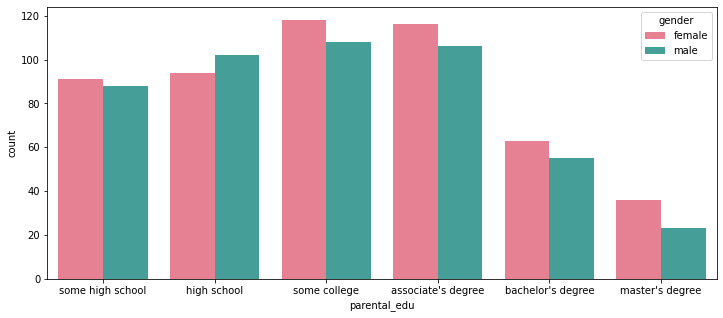

In [0]:
plt.figure(figsize=(12,5))

sns.countplot(data = df, x = 'parental_edu', order=['some high school', 'high school', 'some college', "associate's degree", "bachelor's degree", "master's degree"], hue = 'gender', palette = 'husl')

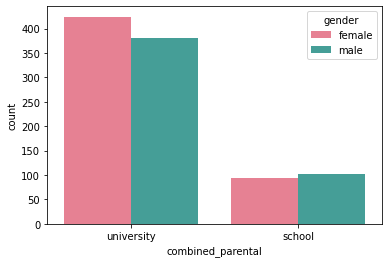

In [0]:
sns.countplot(data = df, x = 'combined_parental', hue = 'gender', palette = 'husl')

- the sample size of parents with lower levels of education (ie. school vs university) small
- the sample size of parents with higher levels of education (ie. Bachelor's and master's) small
- cannot confidently say that students with highly educated parents will score better


## Summary
- seems like statstically, all variables seem to correlate with test scores
- but the effect seems to be more prominent for test preparation course & lunch type
- females seem to be better at writing and reading while males seem to be better at maths